In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
data = pd.read_csv("./gurgaon_properties_missing_value_imputation.csv")
data.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7586.0,3.0,2.0,2,2.0,New Property,850.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0
1,flat,smart world gems,sector 89,0.95,8597.0,2.0,2.0,2,4.0,New Property,1226.0,1.0,1.0,0.0,0.0,0.0,0.0,38.0
2,flat,breez global hill view,sohna road,0.32,5470.0,2.0,2.0,1,17.0,New Property,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0
3,flat,bestech park view sanskruti,sector 92,1.60,8020.0,3.0,4.0,3+,10.0,Relatively New,1615.0,0.0,1.0,0.0,0.0,1.0,1.0,174.0
4,flat,suncity avenue,sector 102,0.48,9023.0,2.0,2.0,1,5.0,Relatively New,582.0,0.0,0.0,1.0,0.0,0.0,0.0,159.0


In [3]:
latlong = pd.read_csv("./latlong.csv")
latlong.head()

,sector,coordinates
0,sector 1,"28.3663° N, 76.9456° E"
1,sector 2,"28.5095° N, 77.0320° E"
2,sector 3,"28.4909° N, 77.0176° E"
3,sector 4,"28.4738° N, 77.0107° E"
4,sector 5,"28.4794° N, 77.0176° E"


In [18]:
latlong["longitude"] = latlong['coordinates'].str.split(",").str.get(0).str.split(' ').str.get(0).str.replace("°","")
latlong["latitude"] = latlong['coordinates'].str.split(",").str.get(1).str.split(" ").str.get(1).str.replace("°","")

In [19]:
latlong

,sector,coordinates,longitude,latitude
0,sector 1,"28.3663° N, 76.9456° E",28.3663,76.9456
1,sector 2,"28.5095° N, 77.0320° E",28.5095,77.0320
2,sector 3,"28.4909° N, 77.0176° E",28.4909,77.0176
3,sector 4,"28.4738° N, 77.0107° E",28.4738,77.0107
4,sector 5,"28.4794° N, 77.0176° E",28.4794,77.0176
...,...,...,...,...
124,sector 113,"28.5287° N, 77.0233° E",28.5287,77.0233
125,sector 114,"28.5334° N, 77.0118° E",28.5334,77.0118
126,sector 115,"28.5385° N, 77.0061° E",28.5385,77.0061
127,gwal pahari,"28.4484° N, 77.0210° E",28.4484,77.0210


In [28]:
merged = data.merge(latlong, on="sector")
merged.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,...,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,coordinates,longitude,latitude
0,flat,signature global park 4,sector 36,0.82,7586.0,3.0,2.0,2,2.0,New Property,...,0.0,0.0,0.0,0.0,0.0,0.0,8.0,"28.4160° N, 76.9914° E",28.4160,76.9914
1,flat,avl 36 gurgaon,sector 36,0.75,7500.0,2.0,2.0,2,5.0,Relatively New,...,0.0,0.0,0.0,0.0,0.0,0.0,26.0,"28.4160° N, 76.9914° E",28.4160,76.9914
2,flat,signature global park 4,sector 36,1.00,9901.0,3.0,2.0,3,2.0,New Property,...,0.0,0.0,0.0,0.0,0.0,0.0,128.0,"28.4160° N, 76.9914° E",28.4160,76.9914
3,flat,krisumi waterfall residences,sector 36,4.10,15501.0,3.0,4.0,3,30.0,New Property,...,1.0,0.0,0.0,0.0,0.0,2.0,49.0,"28.4160° N, 76.9914° E",28.4160,76.9914
4,flat,signature global park 4,sector 36,0.72,6660.0,3.0,2.0,3,3.0,Under Construction,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"28.4160° N, 76.9914° E",28.4160,76.9914


In [51]:
merged["latitude"] = pd.to_numeric(merged['latitude'])
merged["longitude"] = pd.to_numeric(merged["longitude"])

In [79]:
temp = merged.groupby('sector').mean().round(2).reset_index().set_index("sector")[['price',"price_per_sqft","built_up_area", "latitude","longitude"]]

In [80]:
temp

,price,price_per_sqft,built_up_area,latitude,longitude
sector,,,,,
gwal pahari,3.19,9585.78,3056.17,77.02,28.45
manesar,0.96,4608.06,2027.37,76.94,28.35
sector 1,1.86,8249.83,2327.83,76.95,28.37
sector 10,2.09,11866.57,1908.86,77.00,28.45
sector 102,1.70,10603.82,1556.13,76.97,28.48
...,...,...,...,...,...
sector 91,1.65,7586.12,2028.65,76.92,28.40
sector 92,0.93,5928.29,1571.34,76.92,28.41
sector 93,0.85,8009.89,1017.00,76.93,28.42


In [22]:
merged.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft',
       'bedRoom', 'bathroom', 'balcony', 'floorNum', 'agePossession',
       'built_up_area', 'study room', 'servant room', 'store room',
       'pooja room', 'others', 'furnishing_type', 'luxury_score',
       'coordinates', 'longitude', 'latitude'],
      dtype='object')

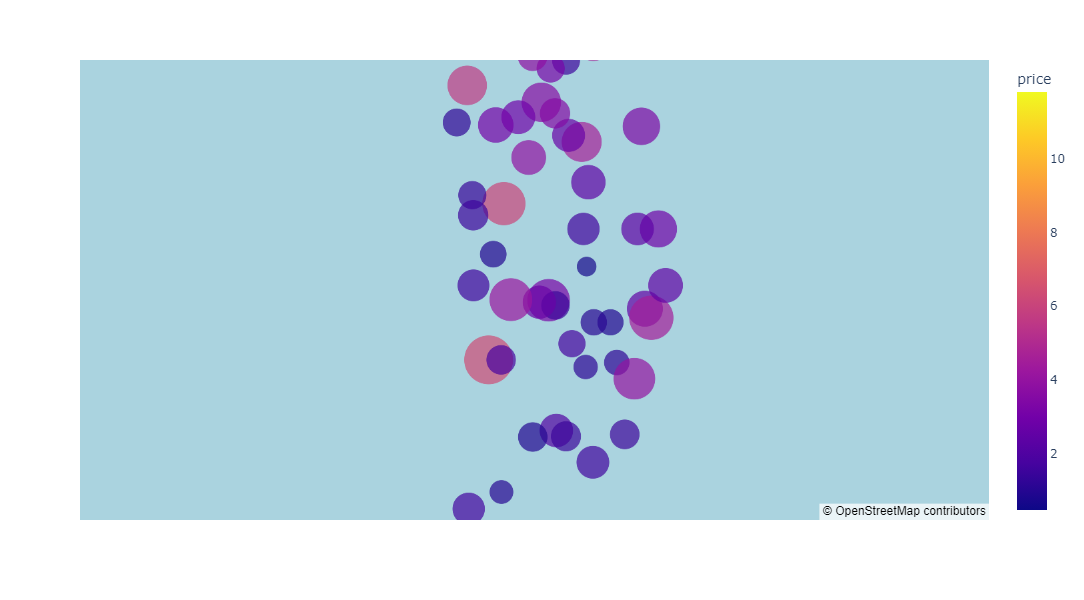

In [77]:
fig = px.scatter_mapbox(temp, lat='latitude', lon='longitude', size="built_up_area", color="price",
                                size_max=35, height=600, width=1000,
                                zoom=10, mapbox_style='open-street-map', hover_name=temp.index
                                )
fig.show()

In [78]:
merged.to_csv("dataviz_geomap.csv", index=False)

# Features Wordcloud
This will show a wordcloud of popular amenities.

In [108]:
prop = pd.read_csv("./gurgaon_properties.csv").drop(columns="Unnamed: 0")
prop.head()

,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,sector
0,house,Bptp Visionnaire,5.25,20115.0,2610.0,Plot area 290(242.48 sq.m.),5.0,4.0,3+,Servant Room,3.0,North-East,0 to 1 Year Old,"['Good Earth City Center 2', 'Kunskapsskolan I...","['1 Wardrobe', '1 Fan', '1 Exhaust Fan', '1 Ge...","['Feng Shui / Vaastu Compliant', 'Private Gard...",sector 70a
1,house,NaN,5.00,43066.0,1161.0,Plot area 129(107.86 sq.m.),21.0,21.0,3+,Servant Room,5.0,North,1 to 5 Year Old,"['Sector 53-54 metro station', 'Sector 54 chow...","['1 Water Purifier', '21 Fan', '1 Fridge', '1 ...","['Feng Shui / Vaastu Compliant', 'Private Gard...",sector 54
2,house,Emaar MGF Marbella,12.00,37037.0,3240.0,Plot area 360(301.01 sq.m.),5.0,5.0,3+,"Servant Room,Pooja Room,Store Room",3.0,East,0 to 1 Year Old,"['Sector 55-56 Rapid Metro Station', 'HUB 66',...","['4 Wardrobe', '1 Water Purifier', '6 Fan', '1...","['Security / Fire Alarm', 'Feng Shui / Vaastu ...",sector 66
3,house,NaN,2.10,23333.0,900.0,Plot area 100(83.61 sq.m.),7.0,7.0,3+,"Store Room,Pooja Room,Study Room",3.0,North-East,1 to 5 Year Old,"['Rajiv Chowk Mosque', 'Icici bank ATM', 'Stat...",NaN,"['High Ceiling Height', 'Maintenance Staff', '...",sector 38
4,house,NaN,3.40,12938.0,2628.0,Plot area 292(244.15 sq.m.),9.0,9.0,3,NaN,3.0,West,5 to 10 Year Old,"['State bank ATM', 'Esic Hospital Gurugram', '...","['9 Wardrobe', '12 Fan', '1 Exhaust Fan', '50 ...","['Feng Shui / Vaastu Compliant', 'Private Gard...",sector 9


In [109]:
wc_df = prop.merge(data, left_index=True, right_index=True)[["sector_y","features"]]

In [111]:
import ast

all_features = []

for row in wc_df["features"].dropna().apply(ast.literal_eval):
    all_features.extend(row)

In [113]:
# converting the list of features to one giant string
features_string = " ".join(all_features)

In [119]:
import pickle
pickle.dump(features_string, open("features_string.pkl", "wb"))

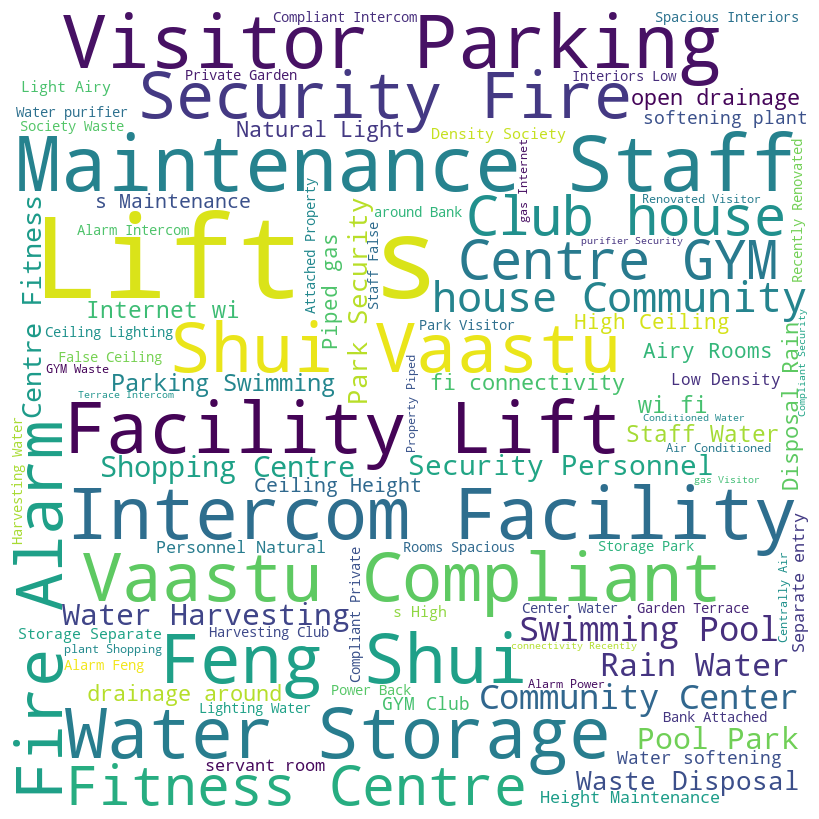

In [116]:
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(features_string)
 
# plot the WordCloud image                       
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

# Scatterplot : Area vs price

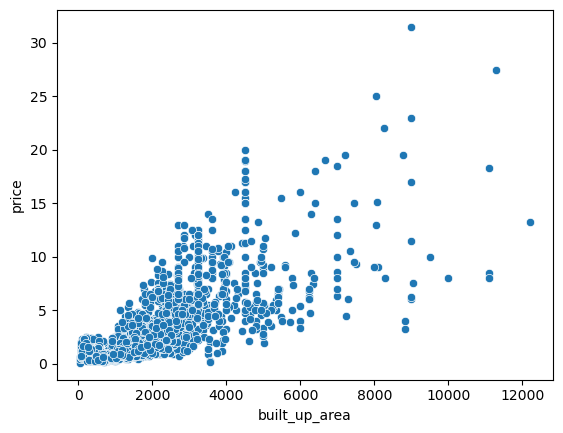

In [124]:
sns.scatterplot(data=data, x="built_up_area", y="price")
plt.show()

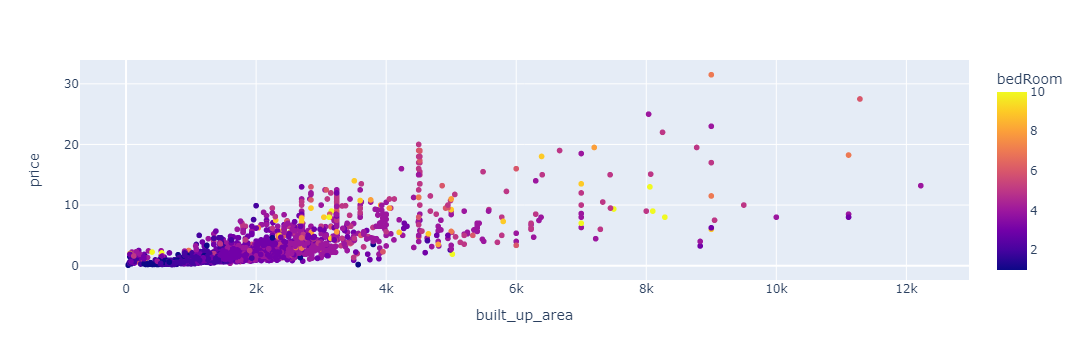

In [129]:
px.scatter(data_frame=data, x="built_up_area", y="price", color="bedRoom")

In [128]:
data.columns

Index(['property_type', 'society', 'sector', 'price', 'price_per_sqft',
       'bedRoom', 'bathroom', 'balcony', 'floorNum', 'agePossession',
       'built_up_area', 'study room', 'servant room', 'store room',
       'pooja room', 'others', 'furnishing_type', 'luxury_score'],
      dtype='object')

# pie chart by bedroom

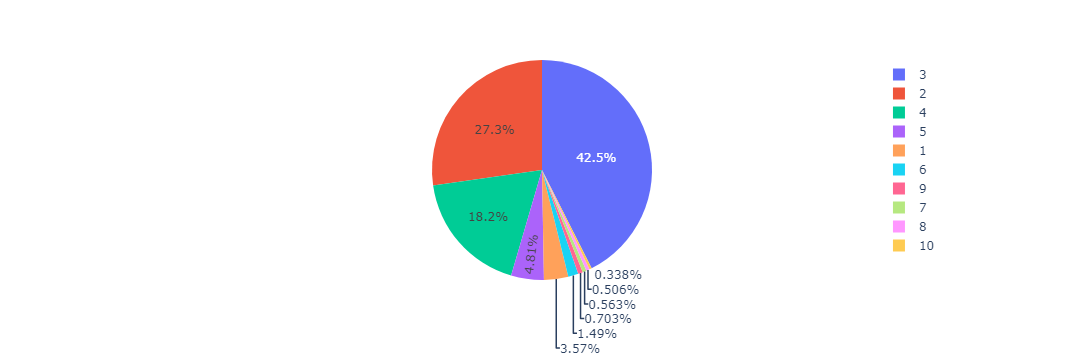

In [132]:
px.pie(data_frame=data, names="bedRoom")

# Boxplot: Comparing price ranges of different BHK values

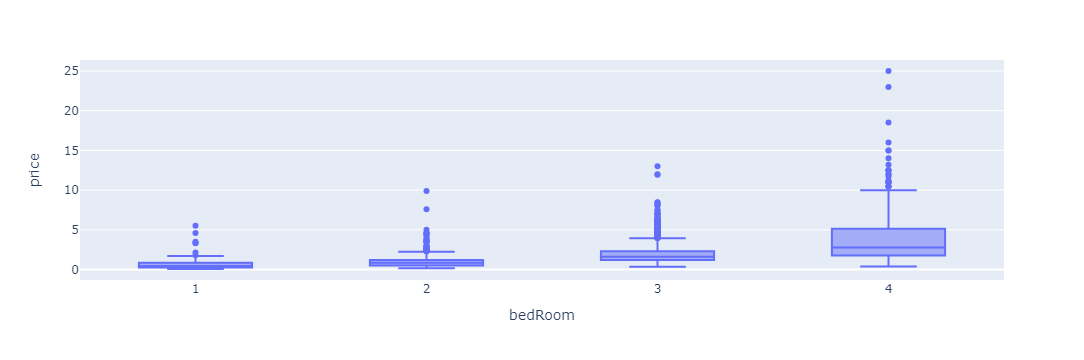

In [138]:
temp_df = data[data["bedRoom"] <=4]
px.box(data_frame=temp_df, x="bedRoom", y="price")

# Distplot of prices for flat and house

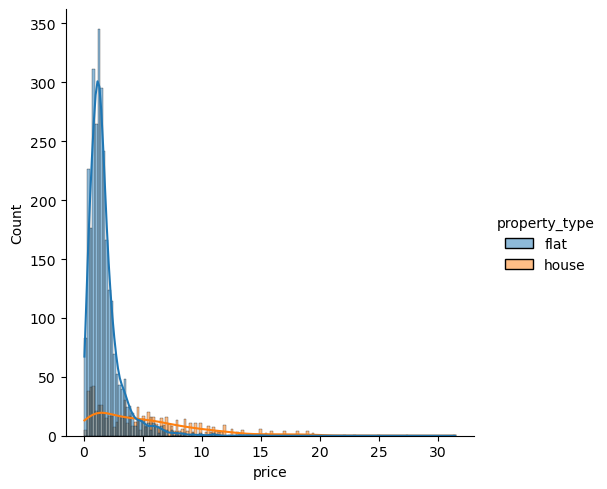

In [151]:
sns.displot(data=data, x="price", hue="property_type", kde=True)
plt.show()